In [11]:
!pip install nltk

In [14]:
import pandas  as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("10k_filings_train.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3045 non-null   object
 1   body    3045 non-null   object
 2   label   3045 non-null   object
dtypes: object(3)
memory usage: 71.5+ KB


In [21]:
data["body"][1]

'\xa0\xa0BUSINESS \n \xa0 \n Overview \n \xa0 \n Pioneer\xa0Power Solutions, Inc. and its subsidiaries (“Pioneer,” “we,” “us,” “our,” or “the Company”) \xa0manufactures, sells and services\xa0a broad range of specialty electrical transmission, distribution and on-site power generation equipment for applications in the utility, industrial, commercial and backup power markets. \xa0Our principal products and services include custom-engineered electrical transformers, switchgear and engine-generator sets and controls, complemented by a national field-service network to maintain and repair power generation assets. We are headquartered in Fort Lee, New Jersey and operate from twelve (12) additional locations in the U.S., Canada and Mexico for manufacturing, service, centralized distribution, engineering, sales and administration. \n \xa0 \n Our largest customers include a number of recognized national and regional utilities, industrial companies and engineering, procurement and construction 

In [18]:
from tqdm import tqdm
ps=PorterStemmer
cleanReview=[]
for i in tqdm(range(0,data.shape[0])):
    review=re.sub('[^a-zA-Z]',' ',data['body'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()  #Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
    all_stopword=stopwords.words('english')
    all_stopword.remove('not') #this will remove 'not from stopwords as it is requried for negative review'
    review=[ps.stem(word) for word in review if not word in set(all_stopword)]
    review=' '.join(review)
    cleanReview.append(review)

100%|██████████| 3045/3045 [07:59<00:00,  6.35it/s]


In [20]:
cleanReview[0]

'busi fiscal year fiscal year consist week period end saturday nearest march accordingli fiscal report period consist week period end april fiscal consist week period end april fiscal report period consist week period end march refer year quarter relat fiscal year fiscal quarter unless otherwis note busi overview electro scientif industri inc subsidiari esi compani lead supplier innov laser base microfabr solut industri reliant microtechnolog esi integr solut allow industri design process engin control power laser light transform materi way differenti consum electron wearabl devic semiconductor circuit high precis compon market advantag found esi headquart portland oregon global oper subsidiari asia europ north america laser microfabr compris set precis micron level process includ drill scribe dice singul cut ablat trim precis mark multipl type materi process requir applic specif laser system abl meet custom exact perform product requir laser base system util product flexibl rigid prin

In [22]:
data["clean"] = cleanReview

In [23]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
data['clean'] = data['clean'].apply(cleanText)

In [25]:
data["clean"][0]

'busi fiscal year fiscal year consist week period end saturday nearest march accordingli fiscal report period consist week period end april fiscal consist week period end april fiscal report period consist week period end march refer year quarter relat fiscal year fiscal quarter unless otherwis note busi overview electro scientif industri inc subsidiari esi compani lead supplier innov laser base microfabr solut industri reliant microtechnolog esi integr solut allow industri design process engin control power laser light transform materi way differenti consum electron wearabl devic semiconductor circuit high precis compon market advantag found esi headquart portland oregon global oper subsidiari asia europ north america laser microfabr compris set precis micron level process includ drill scribe dice singul cut ablat trim precis mark multipl type materi process requir applic specif laser system abl meet custom eact perform product requir laser base system util product fleibl rigid print 

In [26]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
train, test = train_test_split(data, test_size=0.000001 , random_state=42)
def tokenize_text(text):
    tokens = []
    for sent in tqdm(nltk.sent_tokenize(text)):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['clean']), tags=[r.label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['clean']), tags=[r.label]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['clean'].values)
X = tokenizer.texts_to_sequences(data['clean'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

In [30]:
X = tokenizer.texts_to_sequences(data['clean'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3045, 50)


In [104]:
from wordcloud import WordCloud

In [88]:
train_tagged.values

array([TaggedDocument(words=['busi', 'gener', 'cnl', 'growth', 'properti', 'inc', 'organ', 'maryland', 'corpor', 'decemb', 'elect', 'ta', 'current', 'qualifi', 'real', 'estat', 'invest', 'trust', 'reit', 'feder', 'incom', 'ta', 'purpos', 'term', 'us', 'compani', 'cnl', 'growth', 'properti', 'inc', 'includ', 'cnl', 'growth', 'properti', 'inc', 'subsidiari', 'august', 'obtain', 'stockhold', 'approv', 'plan', 'liquid', 'dissolut', 'plan', 'dissolut', 'author', 'us', 'undertak', 'orderli', 'liquid', 'orderli', 'liquid', 'sell', 'remain', 'asset', 'pay', 'known', 'liabil', 'provid', 'payment', 'unknown', 'conting', 'liabil', 'distribut', 'remain', 'cash', 'stockhold', 'liquid', 'distribut', 'wind', 'oper', 'dissolv', 'compani', 'accord', 'maryland', 'law', 'see', 'compani', 'form', 'k', 'file', 'august', 'addit', 'detail', 'result', 'approv', 'plan', 'dissolut', 'stockhold', 'august', 'adopt', 'liquid', 'basi', 'account', 'liquid', 'basi', 'account', 'describ', 'item', 'financi', 'statement

In [33]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 3044/3044 [00:00<00:00, 1382957.25it/s]


In [34]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 3044/3044 [00:00<00:00, 2161046.27it/s]


CPU times: user 18min 20s, sys: 5.1 s, total: 18min 25s
Wall time: 18min 35s


In [46]:
d2v_model.wv.most_similar(positive=['law'], topn=10)

[('statut', 0.6329866647720337),
 ('mccm', 0.4415265619754791),
 ('sunstreet', 0.44004082679748535),
 ('oepa', 0.4295177161693573),
 ('legisl', 0.428187757730484),
 ('myrcen', 0.4279240071773529),
 ('pora', 0.4191795885562897),
 ('prose', 0.4184058904647827),
 ('attor', 0.413979172706604),
 ('sugarcrm', 0.4063168168067932)]

In [65]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding

In [71]:
len(data["label"].unique())

9

In [110]:
model = Sequential()

# Utiliser index_to_key à la place de vocab
vocab_size = len(d2v_model.wv.index_to_key)

# Ajouter l'Embedding Layer
model.add(Embedding(vocab_size + 1, 20, input_length=X.shape[1], trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(9,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import tensorflow as tf

# Modèle de régression logistique
model = Sequential()

# Taille du vocabulaire
vocab_size = len(d2v_model.wv.index_to_key)

# Ajouter une couche d'Embedding (peut être omise si vous utilisez des données numériques)
model.add(Embedding(vocab_size + 1, 20, input_length=X.shape[1], trainable=True))

# Aplatir les données pour la régression logistique (pas de LSTM ici)
model.add(Flatten())

# Ajouter une couche de régression logistique avec activation sigmoïde (binaire)
model.add(Dense(9, activation='sigmoid'))  # Pour une classification binaire

# Résumé du modèle
model.summary()

# Compilation du modèle pour une régression logistique binaire
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [111]:
Y = pd.get_dummies(data['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2588, 50) (2588, 9)
(457, 50) (457, 9)


In [112]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =10, batch_size=batch_size, verbose = 2)

Epoch 1/10
81/81 - 6s - 79ms/step - acc: 0.3176 - loss: 0.3862
Epoch 2/10
81/81 - 4s - 50ms/step - acc: 0.3694 - loss: 0.2846
Epoch 3/10
81/81 - 3s - 31ms/step - acc: 0.3694 - loss: 0.2841
Epoch 4/10
81/81 - 3s - 32ms/step - acc: 0.3694 - loss: 0.2837
Epoch 5/10
81/81 - 7s - 83ms/step - acc: 0.3706 - loss: 0.2823
Epoch 6/10
81/81 - 3s - 34ms/step - acc: 0.3775 - loss: 0.2804
Epoch 7/10
81/81 - 5s - 63ms/step - acc: 0.4007 - loss: 0.2766
Epoch 8/10
81/81 - 3s - 32ms/step - acc: 0.4335 - loss: 0.2672
Epoch 9/10
81/81 - 4s - 51ms/step - acc: 0.4699 - loss: 0.2547
Epoch 10/10
81/81 - 4s - 44ms/step - acc: 0.5166 - loss: 0.2453


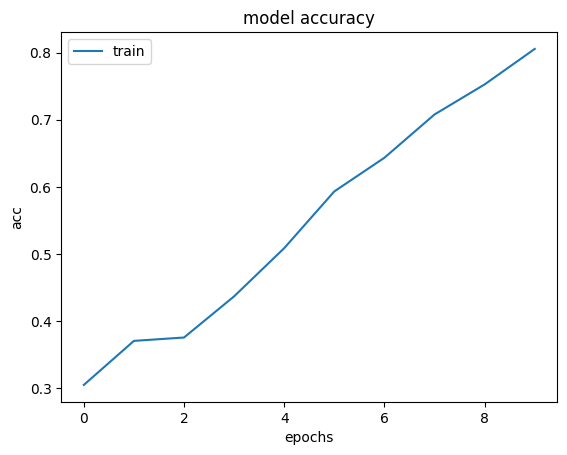

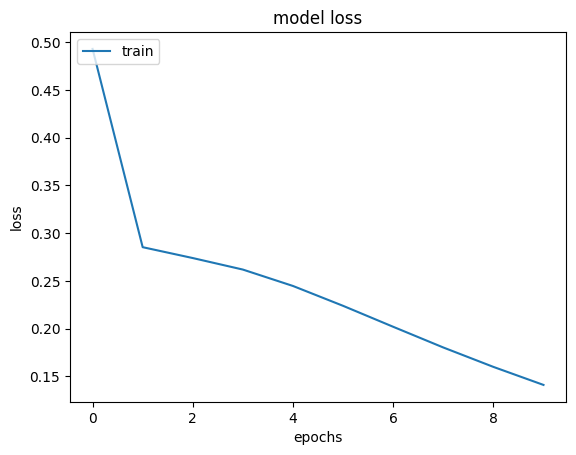

<Figure size 640x480 with 0 Axes>

In [83]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [84]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

81/81 - 0s - 4ms/step - accuracy: 0.8358 - loss: 0.1272
15/15 - 0s - 3ms/step - accuracy: 0.4880 - loss: 0.2658
Train: 0.836, Test: 0.4880


In [85]:
X_train

array([[ 116,  154,  159, ..., 1606,   51,  526],
       [8390,  689,  509, ..., 8553,   94,  409],
       [  53,  178,   20, ...,   58,   32,    6],
       ...,
       [5910,  545,  168, ...,   33,  111,  252],
       [ 308,   27,   40, ...,   24,  927,   53],
       [ 957, 1470,  167, ...,  755,    8,   53]], dtype=int32)

In [96]:
yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = yhat_probs.argmax(axis=-1)

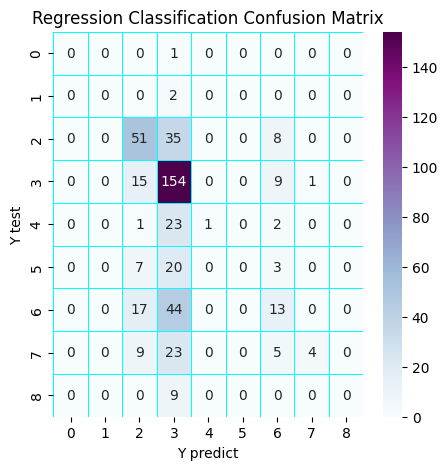

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
rounded_labels = np.argmax(Y_test,axis=1)
yhat_classes = yhat_classes
lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

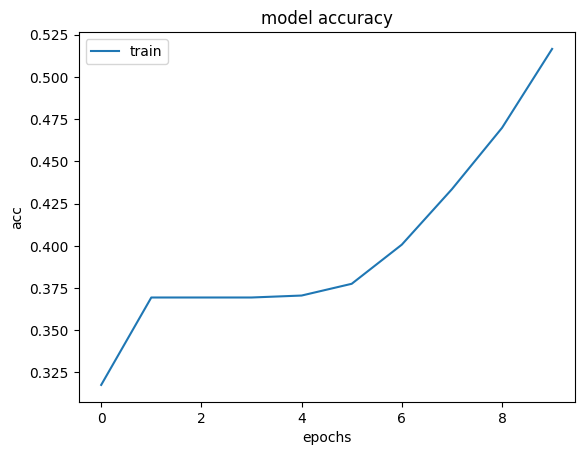

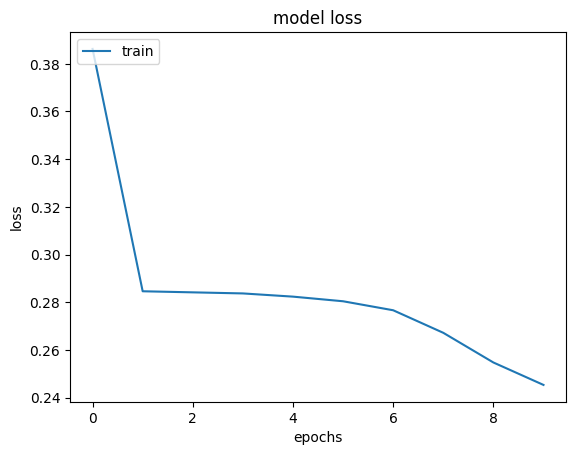

<Figure size 640x480 with 0 Axes>

In [113]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [114]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

81/81 - 1s - 17ms/step - acc: 0.5576 - loss: 0.2328
15/15 - 0s - 13ms/step - acc: 0.4004 - loss: 0.2748
Train: 0.558, Test: 0.4004


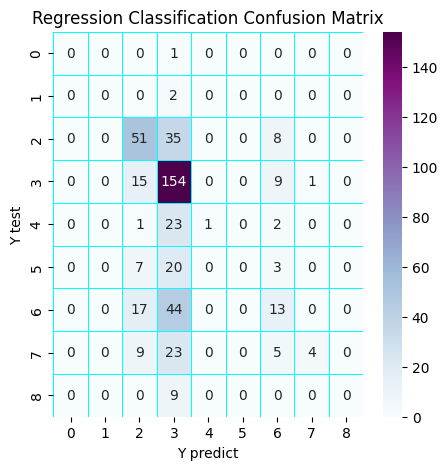

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
rounded_labels = np.argmax(Y_test,axis=1)
yhat_classes = yhat_classes
lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from gensim.models.doc2vec import Doc2Vec

# Supposons que vous avez déjà entraîné votre modèle Doc2Vec
# d2v_model = Doc2Vec(...)

# Utiliser le vocabulaire du modèle Doc2Vec
vocab = d2v_model.wv.index_to_key

# Convertir les documents en vecteurs en utilisant Doc2Vec (via le vocab)
X = [d2v_model.infer_vector(doc.words) for doc in train_tagged]  # ou test_tagged
Y = train['label']  # Colonne des labels

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialisation du modèle RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train, Y_train)

# Prédiction sur les données de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7373


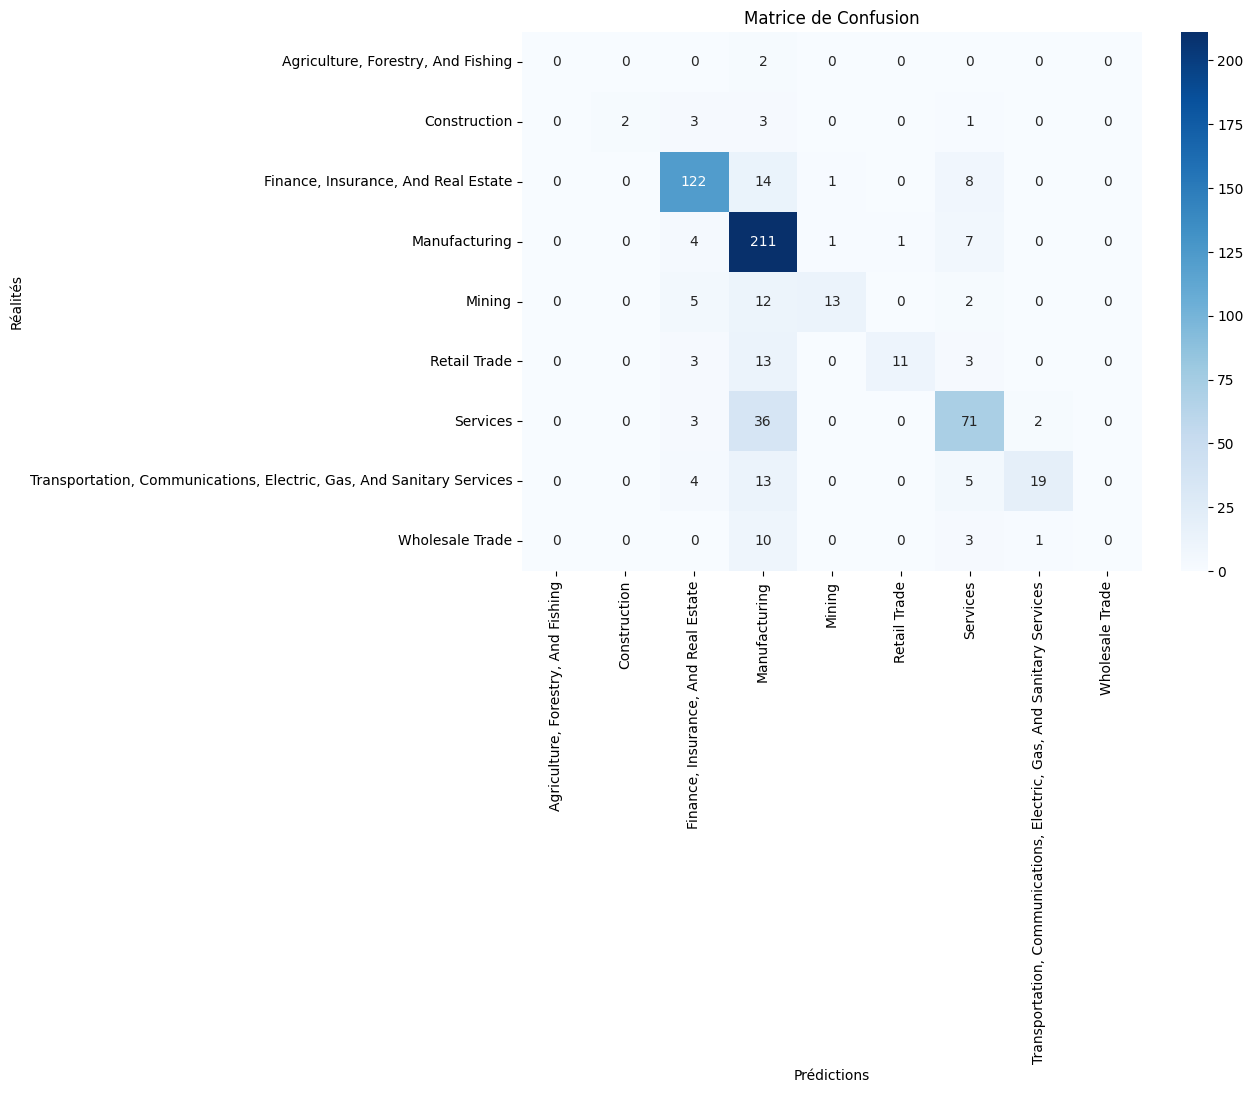

In [123]:
# Calcul de la matrice de confusion
cm = confusion_matrix(Y_test, y_pred, labels=rf_model.classes_)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.title('Matrice de Confusion')
plt.show()